In [14]:
from scipy.integrate import quad
from math import sin,sqrt
from matplotlib import pyplot as plt
import numpy as np

In [15]:
a = float(input("Введіть початок інтервалу (a): "))
b = float(input("Введіть кінець інтервалу (b): "))
n = int(input("Введіть кількість підрозділень (n): "))

In [16]:
user_input = input("Введіть функцію від x (наприклад, x**2): ")
try:
    # Задання введеної функції\n",
    user_function = lambda x: eval(user_input,{'sin':sin,'sqrt':sqrt,'x':x})
except:
    print("Неправильний вираз для функції.")

<h1>Rectangle</h1>

$
S = \sum\limits_{i=0}^{n} y_i \cdot h$
$ S = {h\cdot(y_1+y_2+ ... + y_n)} $

![Nature](http://spiff.rit.edu/classes/phys317/lectures/num_integ2/rect_integ.gif)

In [17]:
def rectangle_method(a, b, n):
    # Метод прямокутників
    h = (b - a) / n
    integral = 0

    for i in range(n):
        x_i = a + i * h
        integral += user_function(x_i)

    integral *= h
    return integral


<h1>Trapezoid</h1>


$ S = \sum\limits_{i=0}^{n-1} \frac{1}{2} \cdot (f(x_i) + f(x_{i+1}))\cdot h $


![Nature](http://spiff.rit.edu/classes/phys317/lectures/num_integ2/trap_integ.gif)

In [18]:
def trapezoidal_method(a, b, n):
    # Метод трапецій\n",
    h = (b - a) / n
    integral = (user_function(a) + user_function(b)) / 2

    for i in range(1, n):
        x_i = a + i * h
        integral += user_function(x_i)

    integral *= h
    return integral

<h1>Parabolic (Simpson)</h1>

$ S = \frac{h}{3} \left[ f(x_0) + 4 \sum_{i=1}^{n/2} f(x_{2i-1}) + 2 \sum_{i=1}^{n/2-1} f(x_{2i}) + f(x_n) \right] $

![Nature](http://spiff.rit.edu/classes/phys317/lectures/num_integ2/simpson_integ.gif)\n"

In [19]:
def Sympson(a, b, n):
    h = (b - a) / n
    sum = user_function(a) + user_function(b)
    k = 0
    for i in range(1, n):
        k = 2 + 2 * (i % 2)
        sum += k * user_function(a + i * h)
    sum *= h / 3
    return sum

In [20]:
def calculate_error(true_value, approx_value):
    # Обчислення похибки інтегрування
    return abs(true_value - approx_value)

In [21]:
def plot_f(x,y):
    plt.plot(x,y)
    plt.axhline(0, color='red', linestyle='--', label='x')
    plt.axvline(x=0, color='red', linestyle='--', label='y')
    plt.title('Graph')
    plt.grid(True)
    plt.show()

Точне значення інтегралу: 41.66666666666666
Метод прямокутників: 35.625, Похибка: 6.041666666666657
Метод трапецій: 41.875, Похибка: 0.2083333333333428
Метод парабол: 41.666666666666664, Похибка: 7.105427357601002e-15


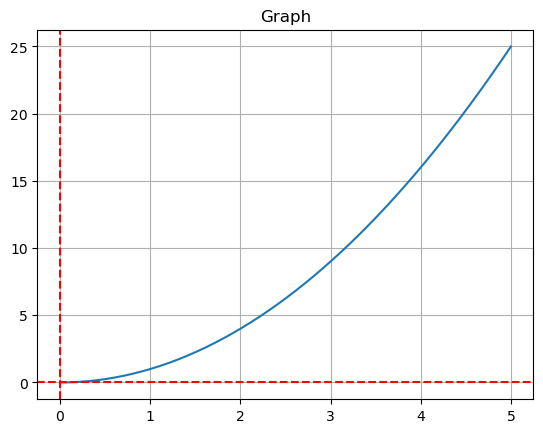

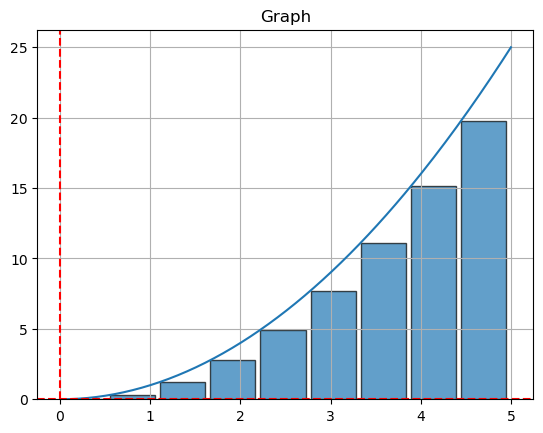

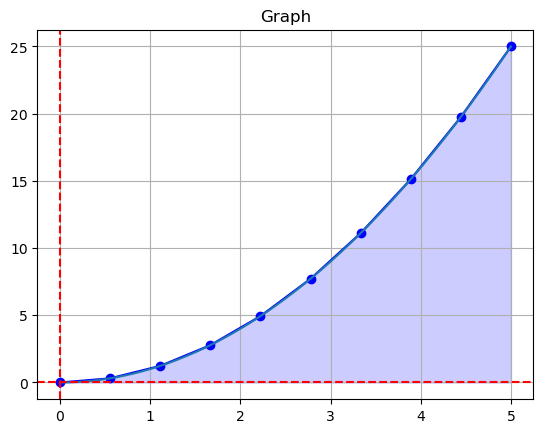

In [22]:
true_integral = quad(user_function, a, b)[0]

# Обчислення за допомогою різних методів\n",
rectangle_integral = rectangle_method(a, b, n)
trapezoidal_integral = trapezoidal_method(a, b, n)
parabolic_integral = Sympson(a, b, n)

# Обчислення похибок\n",
rectangle_error = calculate_error(true_integral, rectangle_integral)
trapezoidal_error = calculate_error(true_integral, trapezoidal_integral)
parabolic_error = calculate_error(true_integral, parabolic_integral)

# Виведення результатів\n",
print(f"Точне значення інтегралу: {true_integral}")
print(f"Метод прямокутників: {rectangle_integral}, Похибка: {rectangle_error}")
print(f"Метод трапецій: {trapezoidal_integral}, Похибка: {trapezoidal_error}")
print(f"Метод парабол: {parabolic_integral}, Похибка: {parabolic_error}")

x = np.linspace(a,b,200)
y = [user_function(i) for i in x]

x_g =np.linspace(a,b,n)
y_g = [user_function(i) for i in x_g]

plot_f(x,y)
plt.bar(x_g[:-1], y_g[:-1], width=(b - a) / n, align='edge', edgecolor='black', alpha=0.7, label='Rectangles')
plot_f(x,y)
plt.plot(x_g, y_g, marker='o', linestyle='-', color='blue', label='Function')
plt.fill_between(x_g, y_g, alpha=0.2, color='blue', label='Trapezoids')
plot_f(x,y)